## Pair Programming - Regresión logística 1

### EDA

---

In [144]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import sidetable 

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de warnings
import warnings
warnings.filterwarnings("ignore")

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

**Objetivos:**
### 1. Buscar un conjunto de datos a analizar.
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.

In [145]:
df = pd.read_csv('../archivos/travel_insurance.csv', index_col=0)
df.head()

,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
Agency,,,,,,,,,,
CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


### 2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado.

A third-party travel insurance servicing company that is based in Singapore.

The attributes:

- Target: Claim Status (Claim.Status)

- Name of agency (Agency)

- Type of travel insurance agencies (Agency.Type)

- Distribution channel of travel insurance agencies (Distribution.Channel)

- Name of the travel insurance products (Product.Name)

- Duration of travel (Duration)

- Destination of travel (Destination)

- Amount of sales of travel insurance policies (Net.Sales)

- Commission received for travel insurance agency (Commission)

- Gender of insured (Gender)

- Age of insured (Age)

### 3. Realizar un EDA sencillo.

In [146]:
#Tamaño
df.shape

(63326, 10)

In [147]:
#Nombre de las columnas
df.columns

Index(['Agency Type', 'Distribution Channel', 'Product Name', 'Claim',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [148]:
#Adaptamos el nombre de las columnas
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [149]:
df.columns

Index(['agency_type', 'distribution_channel', 'product_name', 'claim',
       'duration', 'destination', 'net_sales', 'commision_(in_value)',
       'gender', 'age'],
      dtype='object')

In [150]:
#Información básica
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63326 entries, CBH to JZI
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency_type           63326 non-null  object 
 1   distribution_channel  63326 non-null  object 
 2   product_name          63326 non-null  object 
 3   claim                 63326 non-null  object 
 4   duration              63326 non-null  int64  
 5   destination           63326 non-null  object 
 6   net_sales             63326 non-null  float64
 7   commision_(in_value)  63326 non-null  float64
 8   gender                18219 non-null  object 
 9   age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 5.3+ MB


In [151]:
#Principales estadísticos de las variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,63326.0,49.317074,101.791566,-2.0,9.0,22.00,53.00,4881.0
net_sales,63326.0,40.702018,48.845637,-389.0,18.0,26.53,48.00,810.0
commision_(in_value),63326.0,9.809992,19.804388,0.0,0.0,0.00,11.55,283.5
age,63326.0,39.969981,14.017010,0.0,35.0,36.00,43.00,118.0


📍 duration, net_sales y age --> cheaquear posibles outliers

In [152]:
#Principales estadísticos de las variables categóricas
df.describe(include='object').T

,count,unique,top,freq
agency_type,63326,2,Travel Agency,45869
distribution_channel,63326,2,Online,62219
product_name,63326,26,Cancellation Plan,18630
claim,63326,2,No,62399
destination,63326,149,SINGAPORE,13255
gender,18219,2,M,9347


📍 product_name y destination --> reagrupar en menos categorías

In [153]:
#Recategorizamos product_name
df.product_name.value_counts()

Cancellation Plan                       18630
2 way Comprehensive Plan                13158
Rental Vehicle Excess Insurance          8580
Basic Plan                               5469
Bronze Plan                              4049
1 way Comprehensive Plan                 3331
Value Plan                               2715
Silver Plan                              2249
Annual Silver Plan                       1423
Ticket Protector                         1056
Travel Cruise Protect                     527
Comprehensive Plan                        364
Gold Plan                                 352
24 Protect                                247
Single Trip Travel Protect Gold           204
Annual Gold Plan                          194
Premier Plan                              194
Single Trip Travel Protect Silver         173
Annual Travel Protect Gold                100
Annual Travel Protect Silver               86
Individual Comprehensive Plan              74
Single Trip Travel Protect Platinu

In [154]:
df_lista= pd.DataFrame(df['product_name'].value_counts()).reset_index()


In [155]:
lista_seguros = df_lista['index'].tolist()

In [156]:
lista_seguros

['Cancellation Plan',
 '2 way Comprehensive Plan',
 'Rental Vehicle Excess Insurance',
 'Basic Plan',
 'Bronze Plan',
 '1 way Comprehensive Plan',
 'Value Plan',
 'Silver Plan',
 'Annual Silver Plan',
 'Ticket Protector',
 'Travel Cruise Protect',
 'Comprehensive Plan',
 'Gold Plan',
 '24 Protect',
 'Single Trip Travel Protect Gold',
 'Annual Gold Plan',
 'Premier Plan',
 'Single Trip Travel Protect Silver',
 'Annual Travel Protect Gold',
 'Annual Travel Protect Silver',
 'Individual Comprehensive Plan',
 'Single Trip Travel Protect Platinum',
 'Annual Travel Protect Platinum',
 'Spouse or Parents Comprehensive Plan',
 'Child Comprehensive Plan',
 'Travel Cruise Protect Family']

In [157]:
mapa_seguros = {'Cancellation Plan' : 'Cancellation Plan' ,
 '2 way Comprehensive Plan':'2 way Comprehensive Plan' ,
 'Rental Vehicle Excess Insurance': 'Rental Vehicle Excess Insurance',
 'Basic Plan':'Basic Plan' ,
 'Bronze Plan':'Bronze Plan',
 '1 way Comprehensive Plan': '1 way Comprehensive Plan',
 'Value Plan': 'Value Plan',
 'Silver Plan':'Silver Plan',
 'Annual Silver Plan':'Annual Silver Plan',
 'Ticket Protector': 'Ticket Protector',
 'Travel Cruise Protect': 'Travel Cruise Protect' ,
 'Comprehensive Plan':'Comprehensive Plan',
 'Gold Plan':'Gold Plan',
 '24 Protect': 'Others insurances',
 'Single Trip Travel Protect Gold':'Others insurances',
 'Annual Gold Plan':'Others insurances',
 'Premier Plan' :'Others insurances',
 'Single Trip Travel Protect Silver' : 'Others insurances',
 'Annual Travel Protect Gold' : 'Others insurances',
 'Annual Travel Protect Silver': 'Others insurances',
 'Individual Comprehensive Plan': 'Others insurances',
 'Single Trip Travel Protect Platinum': 'Others insurances',
 'Annual Travel Protect Platinum': 'Others insurances',
 'Spouse or Parents Comprehensive Plan': 'Others insurances',
 'Child Comprehensive Plan': 'Others insurances',
 'Travel Cruise Protect Family': 'Others insurances'}

In [158]:
df['product_name'] = df['product_name'].map(mapa_seguros)

In [159]:
df['product_name'].value_counts()

Cancellation Plan                  18630
2 way Comprehensive Plan           13158
Rental Vehicle Excess Insurance     8580
Basic Plan                          5469
Bronze Plan                         4049
1 way Comprehensive Plan            3331
Value Plan                          2715
Silver Plan                         2249
Others insurances                   1423
Annual Silver Plan                  1423
Ticket Protector                    1056
Travel Cruise Protect                527
Comprehensive Plan                   364
Gold Plan                            352
Name: product_name, dtype: int64

In [160]:
#Recategorizar destination




In [161]:
#Porcenaje valores nulos
df.isnull().sum()*100/df.shape[0]

agency_type              0.000000
distribution_channel     0.000000
product_name             0.000000
claim                    0.000000
duration                 0.000000
destination              0.000000
net_sales                0.000000
commision_(in_value)     0.000000
gender                  71.229827
age                      0.000000
dtype: float64

In [162]:
df.gender.value_counts() 

M    9347
F    8872
Name: gender, dtype: int64

📍 Reemplazamos los valores nulos de gender por una tercera categoría, 'prefer not say'/ 'PNS'

In [163]:
df.gender.fillna('PNS', inplace=True)

In [164]:
df.gender.value_counts()

PNS    45107
M       9347
F       8872
Name: gender, dtype: int64

In [165]:
#Valores duplicados
df.duplicated().sum()

8044

In [166]:
#Borramos las filas duplicadas
df.drop_duplicates(inplace=True)

In [167]:
#Tipo de los datos que tenemos
df.dtypes

agency_type              object
distribution_channel     object
product_name             object
claim                    object
duration                  int64
destination              object
net_sales               float64
commision_(in_value)    float64
gender                   object
age                       int64
dtype: object

### 4. Análisis exploratorio visual.

In [168]:
#Variable respuesta
df.claim.unique()

array(['No', 'Yes'], dtype=object)

In [169]:
df.claim.value_counts()

No     54361
Yes      921
Name: claim, dtype: int64

### 4.1. Distribución de la variable respuesta

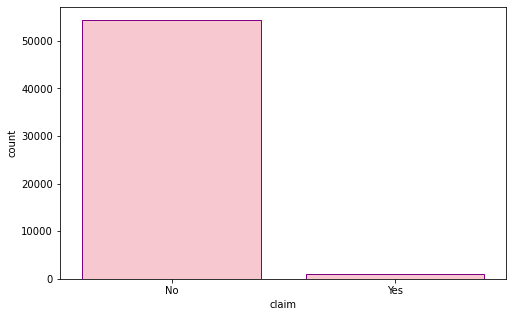

In [180]:
#Gráfica de distribución de la variable respuesta
plt.figure(figsize=(8,5))

fig1 = sns.countplot(data = df, x = "claim",  color = "pink",  edgecolor='purple')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

In [171]:
#Porcentajes variable respuesta
df["claim"].value_counts() / df.shape[0]

No     0.98334
Yes    0.01666
Name: claim, dtype: float64

### 4.2. Distribución de las variables categóricas.

In [172]:
#Gráficas de distribución de las variables categóricas

### 4.3. Distribución de las variables numéricas.

In [173]:
#Gráficas de distribuciuón de las variables numéricas

### 4.4. Correlación.

In [174]:
#Gráfico de correlación

### 4.5. Tratamiento de outliers.

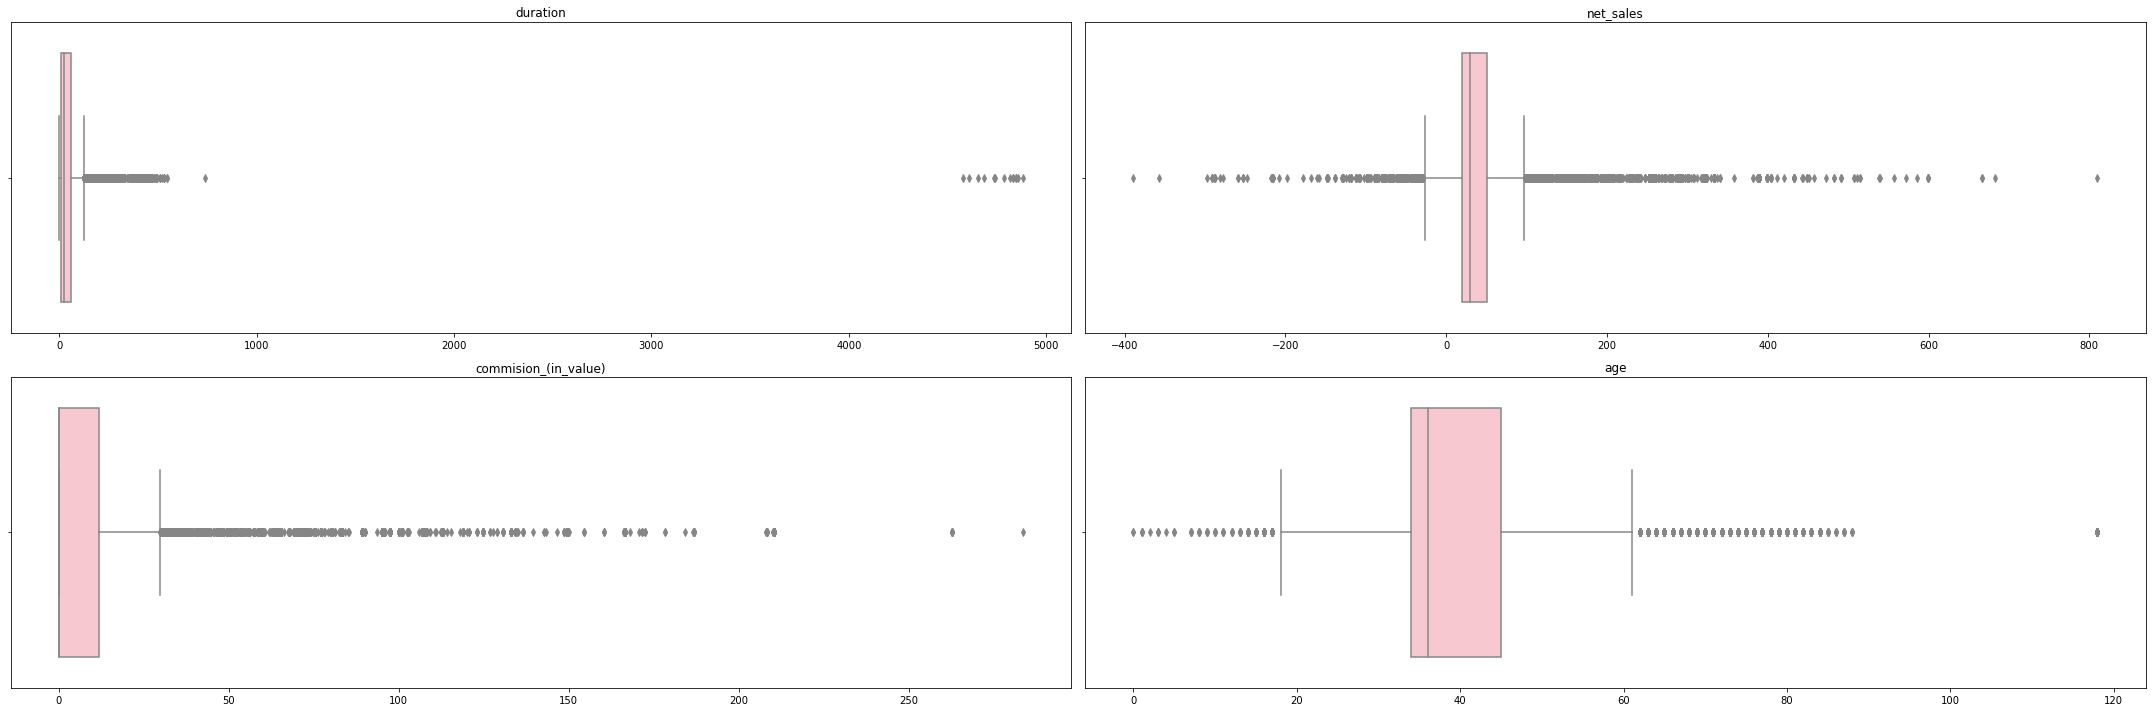

In [181]:
#Gráfica de outliers
fig, axes = plt.subplots(2, 2, figsize=(30,10))

df_numericas = df.select_dtypes(include = np.number)
categorias = df_numericas.columns

axes = axes.flat

for indice, cate in enumerate(categorias):

    sns.boxplot(x = df[cate], data = df, ax=axes[indice], color = "pink");
    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

---> Recategorizar la columna duration:

=< 15

< 100

100 a 1000

más de 1000


### 5. Interpretación de los resultados.

### 6. Guardad el dataframe.

In [176]:
df.to_csv('../archivos/travel_1.csv')